**Problem Statement**

It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.

Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

**Dataset Description**

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

**Variables	Description**

InvoiceNo	Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

StockCode	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product

Description	Product (item) name. Nominal

Quantity	The quantities of each product (item) per transaction. Numeric

InvoiceDate	Invoice Date and time. Numeric, the day and time when each transaction was generated

UnitPrice	Unit price. Numeric, product price per unit in sterling

CustomerID	Customer number. Nominal, a six digit integral number uniquely assigned to each customer

Country	Country name. Nominal, the name of the country where each customer resides

**Project Task: 1**

**Data Cleaning:**

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

**Data Transformation:**

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
#missing value treatment

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing description of product won't effect our analysis. We drop this column any way.


In [ ]:
df['InvoiceNo'].nunique()

25900

There are Total 25900 unique invoice numbers

In [ ]:
df['CustomerID'].nunique()

4372

There are total 4372 customers consisting total 541909 orders 

In [ ]:
second_df= df[df['CustomerID'].isnull()]

In [ ]:
second_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
second_df.shape

(135080, 8)

In [ ]:
df2 = second_df.groupby(['InvoiceNo'])
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541323,581498,15056bl,EDWARDIAN PARASOL BLACK,2,2011-12-09 10:26:00,12.46,NaN,United Kingdom
541324,581498,20669,RED HEART LUGGAGE TAG,3,2011-12-09 10:26:00,2.46,NaN,United Kingdom
541325,581498,20679,EDWARDIAN PARASOL RED,5,2011-12-09 10:26:00,12.46,NaN,United Kingdom
541326,581498,20712,JUMBO BAG WOODLAND ANIMALS,3,2011-12-09 10:26:00,4.13,NaN,United Kingdom


In [ ]:
second_df['InvoiceNo'].nunique()

3710

As we see after our analysis, 3710 InvoiceNo don't have a customerID.
and 3710 is comparitively very less the total InvoiceNo 25900.
Data without customerID is no Use.
so we drop this.

In [ ]:
 df.dropna(subset=['CustomerID'], inplace=True )

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#remove duplicates

df.duplicated().sum()

5225

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
#descriptive analysis

df['Country'].nunique()

37

There are total 37 countries

In [ ]:
#customer country wise

df3 = pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())

In [ ]:
ccw = pd.DataFrame(df3).sort_values(by='CustomerID', ascending=False)
ccw

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [ ]:
#customer order more than once
orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
order_perc = np.sum(orders>1)/df['CustomerID'].nunique()
print(f'{100 * order_perc:.2f}% of customers ordered more than one item.') 

69.97% of customers ordered more than one item.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


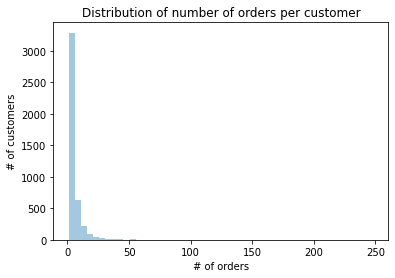

In [ ]:
#ploting number of orders
ax = sns.distplot(orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer', xlabel='# of orders', ylabel='# of customers');

In [ ]:
import datetime as dt
from operator import attrgetter

In [ ]:
#cohort analysis
df['order_month']=df['InvoiceDate'].dt.to_period('M')

In [ ]:
df['cohort']=df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12


In [ ]:
df_cohort=pd.DataFrame(df.groupby(['cohort','order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False))

In [ ]:
#active customers in each cohort
df_cohort['period_number']= (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [ ]:
cohort_pivot= df_cohort.pivot_table(index='cohort', values='n_customers', columns='period_number')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#retention rate of customers
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [ ]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.colors as mcolors

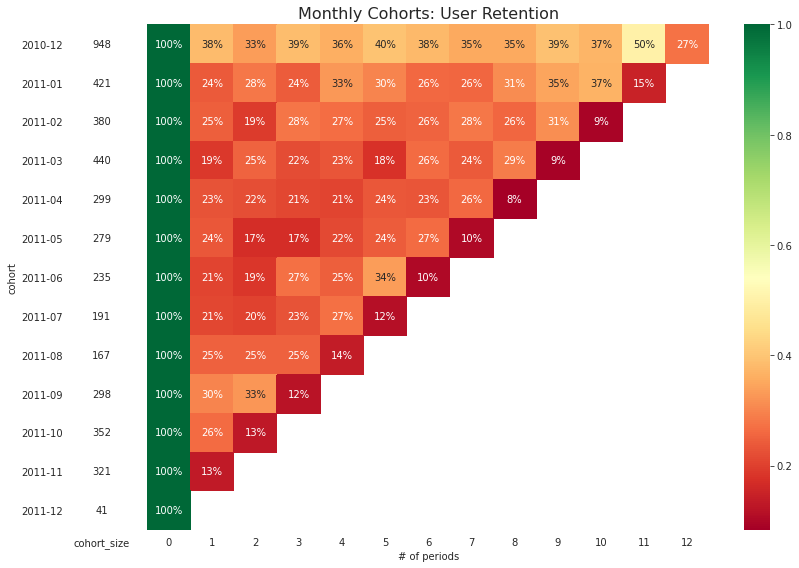

In [ ]:
with sns.axes_style('white'):
  fig, ax=plt.subplots(1,2,figsize=(12,8), sharey=True, gridspec_kw={'width_ratios':[1,11]})


  #retention matrix
  sns.heatmap(retention_matrix,
              mask=retention_matrix.isnull(),
              annot=True,
              fmt='.0%',
              cmap='RdYlGn',
              ax=ax[1])
  ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
  ax[1].set(xlabel='# of periods', ylabel='')

  #cohort size
  cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0:'cohort_size'})
  white_cmap = mcolors.ListedColormap(['white'])
  sns.heatmap(cohort_size_df,
              annot=True,
              cbar=False,
              fmt='g',
              cmap=white_cmap,
              ax=ax[0])
  
  fig.tight_layout()

**Project Task:2**

**Data Modeling :**

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

**Methodology**

To get the RFM score of a customer, we need to first calculate the R, F and M scores on a scale from 1 (worst) to 5 (best).

1. calculate Recency = number of days since last purchase

2. calculate Freqency = number of purchases during the studied period (usually one year)

3. calculate Monetary = total amount of purchases made during the studied period

4. find quintiles for each of these dimensions

5. give a grade to each dimension depending in which quintiles it stands

6. combine R, F and M scores to get the RFM score

7. map RF scores to segments

In [ ]:
df['Price'] = df['Quantity']*df['UnitPrice']

In [ ]:
#combine InvoiceNo

new_df = df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'Price': lambda x : x.sum()}).reset_index()
new_df.head()

,InvoiceNo,InvoiceDate,CustomerID,Price
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
from datetime import timedelta

In [ ]:
#create a refdate to calculate the Recency score

refdate = new_df['InvoiceDate'].max() + timedelta(days=1)
refdate

Timestamp('2011-12-10 12:50:00')

In [ ]:
#to study the data over a period of one year
period = 365

In [ ]:
#to calculate recency: add a column with the number of days between the purchase and refdate

new_df['daysincelastorder']= new_df['InvoiceDate'].apply(lambda x: (refdate - x).days)

In [ ]:
#creating dataframe for receny (number of days since last order) and frequency (total number of orders in last period)

aggr = {'daysincelastorder': lambda x:x.min(), 
        'InvoiceDate' : lambda x:len([d for d in x if d>= refdate - timedelta(days=period)])}

rfm = new_df.groupby('CustomerID').agg(aggr).reset_index()
rfm.rename(columns={'daysincelastorder':'Recency', 'InvoiceDate':'Frequency'}, inplace=True)
rfm.head()

,CustomerID,Recency,Frequency
0,12346.0,326,2
1,12347.0,2,6
2,12348.0,75,4
3,12349.0,19,1
4,12350.0,310,1


In [ ]:
#add the Monetary value of each customer by adding sales over the last year

rfm['Monetary']=rfm['CustomerID'].apply(lambda x:new_df[(new_df['CustomerID']==x) & (new_df['InvoiceDate'] >= refdate - timedelta(days=period))]['Price'].sum())
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,6,3598.21
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
#finding quintiles for each parameter

quintiles = rfm[['Recency','Frequency','Monetary']].quantile([.2,.4,.6,.8]).to_dict()
quintiles

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Monetary': {0.2: 214.45600000000002,
  0.4: 439.26200000000006,
  0.6: 869.3879999999999,
  0.8: 1897.4440000000002},
 'Recency': {0.2: 11.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.80000000000018}}

In [ ]:
#assign rank from 1 to 5. A smaller Recency value is better whereas higher Frequency and Monetary values are better

def r_score(x):
  if x <= quintiles['Recency'][.2]:
    return 5
  elif x <= quintiles['Recency'][.4]:
    return 4
  elif x <= quintiles['Recency'][.6]:
    return 3
  elif x <= quintiles['Recency'][.8]:
    return 2
  else:
    return 1



In [ ]:
def fm_score(x,c):
  if x <= quintiles[c][.2]:
    return 1
  elif x <= quintiles[c][.4]:
    return 2
  elif x <= quintiles[c][.6]:
    return 3
  elif x <= quintiles[c][.8]:
    return 4
  else:
    return 5

In [ ]:
#calculate R, F and M score

rfm['R']=rfm['Recency'].apply(lambda x: r_score(x))
rfm['F']=rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M']=rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
#combine RFM score
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,12346.0,326,2,0.00,1,2,1,121
1,12347.0,2,6,3598.21,5,4,5,545
2,12348.0,75,4,1797.24,2,4,4,244
3,12349.0,19,1,1757.55,4,1,4,414
4,12350.0,310,1,334.40,1,1,2,112


RFM score give us 125 segmennts which is not east to deal. We divide them into 10 segmensts based on R and F score.

**Segment	:                           Description**


---


1. Trusted   	  :                   Bought recently, buy often and spend the most

2. Loyal Customers	  :             Buy on a regular basis. Responsive to promotions.

3. Potential Loyalist	    :         Recent customers with average frequency.

4. Recent Customers     :         	Bought most recently, but not often.

5. Promising	     :                Recent shoppers, but haven’t spent much.

6. Customers Needing Attention  : 	Above average recency, frequency and monetary values. May not have bought very recently though.

7. About To Sleep	    :             Below average recency and frequency. Will lose them if not reactivated.

8. At Risk	     :                  Purchased often but a long time ago. Need to bring them back!

9. Can’t Lose Them	  :             Used to purchase frequently but haven’t returned for a long time.

10. Hibernating	 :                Last purchase was long back and low number of orders. May be lost.

In [ ]:
segmentation = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': "can't loose",
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'Trusted',
}

rfm['Segment']=rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment']=rfm['Segment'].replace(segmentation, regex=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,12346.0,326,2,0.00,1,2,1,121,hibernating
1,12347.0,2,6,3598.21,5,4,5,545,Trusted
2,12348.0,75,4,1797.24,2,4,4,244,at risk
3,12349.0,19,1,1757.55,4,1,4,414,promising
4,12350.0,310,1,334.40,1,1,2,112,hibernating


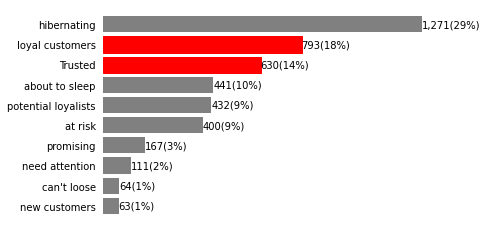

In [ ]:
# count of number of customers in each segment

seg_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(seg_counts)), seg_counts, color='grey')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(seg_counts)))
ax.set_yticklabels(seg_counts.index)

for i, bar in enumerate(bars):
  value = bar.get_width()
  if seg_counts.index[i] in ['Trusted','loyal customers']:
    bar.set_color('red')
  ax.text(value,
          bar.get_y() + bar.get_height()/2,
          '{:,}({:}%)'.format(int(value),
                              int(value*100/seg_counts.sum())),
          va='center',
          ha='left'
          )
  
plt.show()

**Project Task: 3**

**Data Modeling :**


1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [ ]:
cluster = rfm
cluster = cluster.reset_index(level=0).iloc[:,[3,4]].values

pd.DataFrame(cluster)

,0,1
0,2.0,0.00
1,6.0,3598.21
2,4.0,1797.24
3,1.0,1757.55
4,1.0,334.40
...,...,...
4367,1.0,180.60
4368,1.0,80.82
4369,3.0,176.60
4370,16.0,2045.53


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
cluster = sc.fit_transform(cluster)

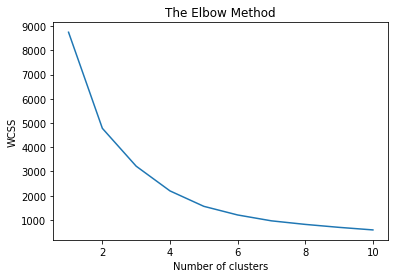

In [ ]:
from sklearn.cluster import KMeans
wcss= []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++')
  kmeans.fit(cluster)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters to be formed is 4

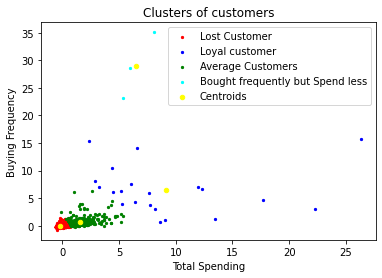

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(cluster)

plt.scatter(cluster[y_kmeans == 0, 0], cluster[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Lost Customer')
plt.scatter(cluster[y_kmeans == 1, 0], cluster[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Loyal customer')
plt.scatter(cluster[y_kmeans == 2, 0], cluster[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Average Customers')
plt.scatter(cluster[y_kmeans == 3, 0], cluster[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Bought frequently but Spend less')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total Spending')
plt.ylabel('Buying Frequency')
plt.legend()
plt.show()

**Project Task: 4**

**Data Reporting:**

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Plot error (cost) vs. number of clusters selected

f. Visualize to compare the RFM values of the clusters using heatmap

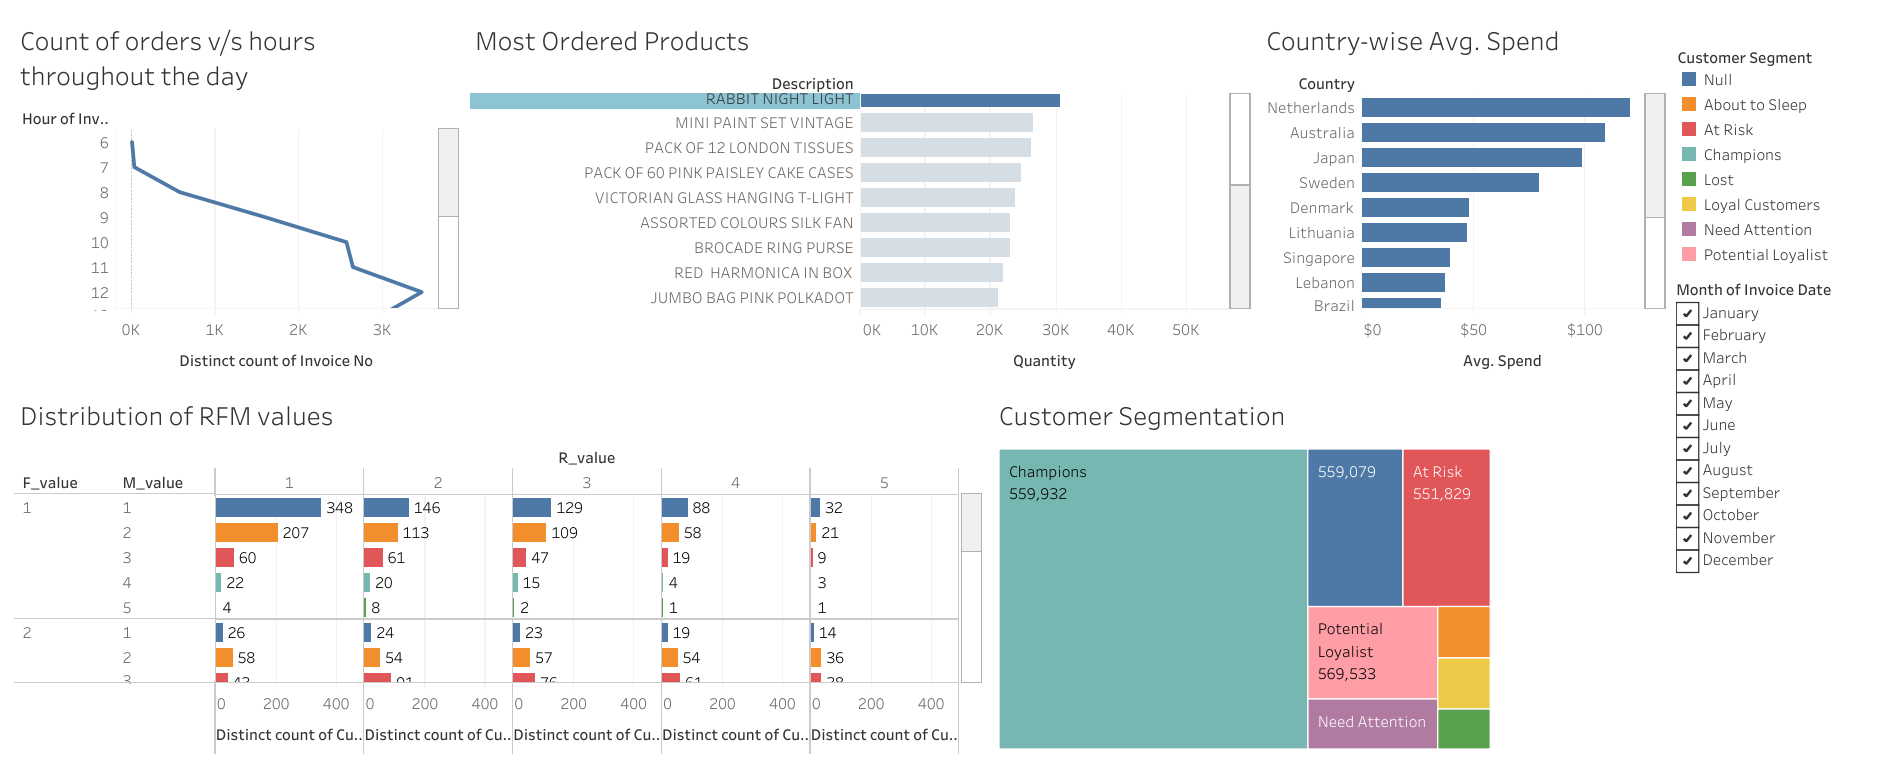